**Desafio 4: Venda de Veículos Usados**

Base de Dados: desafio_carros_usados.csv
● id: Identificador único do veículo

● make: Marca do carro (ex: Ford, Toyota)

● model: Modelo do carro

● year: Ano de fabricação

● price: Preço de venda do carro

● mileage: Quilometragem (km rodados)

● engine_size: Tamanho do motor (em litros)

● fuel_type: Tipo de combustível (gasolina, diesel, elétrico)

● transmission: Tipo de transmissão (manual, automática)

● doors: Número de portas

● color: Cor do carro

● tax: Taxa anual de imposto veicular

● mpg: Milhas por Galão(indicador de eficiência de combustível)

● sold_date: Data de venda do veículo

In [1]:
# Importando bibliotecas
import pandas as pd
import numpy as np
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

df = pd.read_csv("desafio_carros_usados.csv")
df.head()

,id,make,model,year,price,mileage,engine_size,fuel_type,transmission,doors,color,tax,mpg,sold_date
0,1,Volkswagen,Model B,2022,23859,94811,3.6,Diesel,Manual,2,Grey,288,39.2,2023-10-11
1,2,Chevrolet,Model A,2008,16953,128028,4.9,Diesel,Manual,5,Red,339,15.3,2021-04-22
2,3,BMW,Model B,2006,12332,49178,4.1,Diesel,Automatic,4,Red,458,37.2,2020-05-04
3,4,Chevrolet,Model B,2018,18475,42821,2.7,Hybrid,Manual,5,Silver,486,43.7,2021-06-20
4,5,Chevrolet,Model C,2017,12129,192799,2.8,Gasoline,Manual,4,Silver,295,19.1,2021-12-06


1. Análise de Correlação:

○ Calcule a correlação entre as variáveis numéricas e o preço do carro
(price)?

In [2]:
df.dtypes

,0
id,int64
make,object
model,object
year,int64
price,int64
mileage,int64
engine_size,float64
fuel_type,object
transmission,object
doors,int64


In [3]:
df_numeric = df[['price', 'year', 'mileage', 'engine_size', 'tax', 'mpg', 'doors']]
corr_matrix = df_numeric.corr()
print(corr_matrix['price'].sort_values(ascending=False))

price          1.000000
doors          0.033304
mileage        0.011115
tax            0.009043
engine_size   -0.000181
mpg           -0.008201
year          -0.033064
Name: price, dtype: float64


○ Quais variáveis estão mais correlacionadas com o preço?

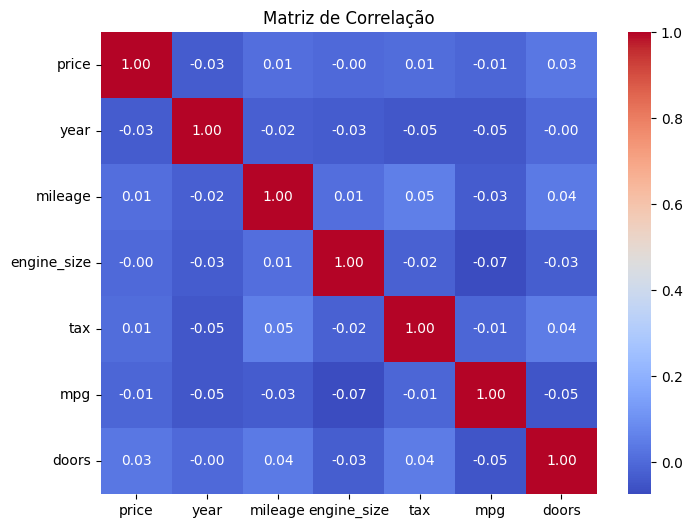

In [4]:
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
plt.title('Matriz de Correlação')
plt.show()

○ Quais estão menos correlacionadas?

In [5]:
# Selecionar apenas colunas numéricas
df_numeric = df.select_dtypes(include=[np.number])

# Matriz de correlação
correlation_matrix = df_numeric.corr()

# Correlação com preço
correlation_with_price = correlation_matrix['price'].sort_values(ascending=False)

print("\nCorrelação com o preço (ordenado):")
print(correlation_with_price)

# Top 5 mais correlacionadas (excluindo a própria price)
top5_corr = correlation_with_price.drop('price').head(5)
print("\nTop 5 variáveis mais correlacionadas com o preço:")
print(top5_corr)

# 5 menos correlacionadas
bottom5_corr = correlation_with_price.drop('price').tail(5)
print("\n5 variáveis menos correlacionadas com o preço:")
print(bottom5_corr)



Correlação com o preço (ordenado):
price          1.000000
id             0.040274
doors          0.033304
mileage        0.011115
tax            0.009043
engine_size   -0.000181
mpg           -0.008201
year          -0.033064
Name: price, dtype: float64

Top 5 variáveis mais correlacionadas com o preço:
id             0.040274
doors          0.033304
mileage        0.011115
tax            0.009043
engine_size   -0.000181
Name: price, dtype: float64

5 variáveis menos correlacionadas com o preço:
mileage        0.011115
tax            0.009043
engine_size   -0.000181
mpg           -0.008201
year          -0.033064
Name: price, dtype: float64


**2.  Análise das 5 Variáveis Mais Correlacionadas:**

Para as cinco variáveis com maior correlação com o preço:


○ Plote histograma e boxplot de cada variável.


=== Análise para variável: id ===


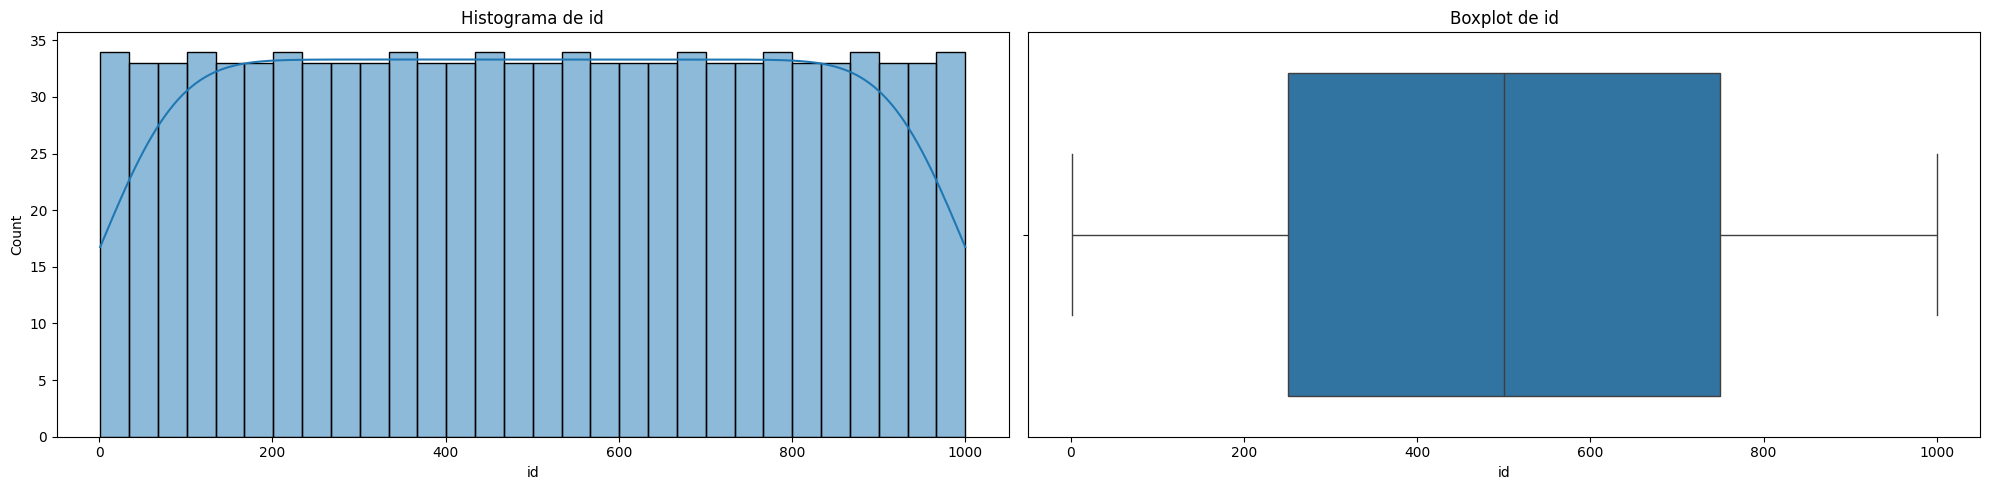


Regressão Linear Simples:
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1.621
Date:                Tue, 06 May 2025   Prob (F-statistic):              0.203
Time:                        23:18:05   Log-Likelihood:                -10305.
No. Observations:                1000   AIC:                         2.061e+04
Df Residuals:                     998   BIC:                         2.062e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.002e+04    

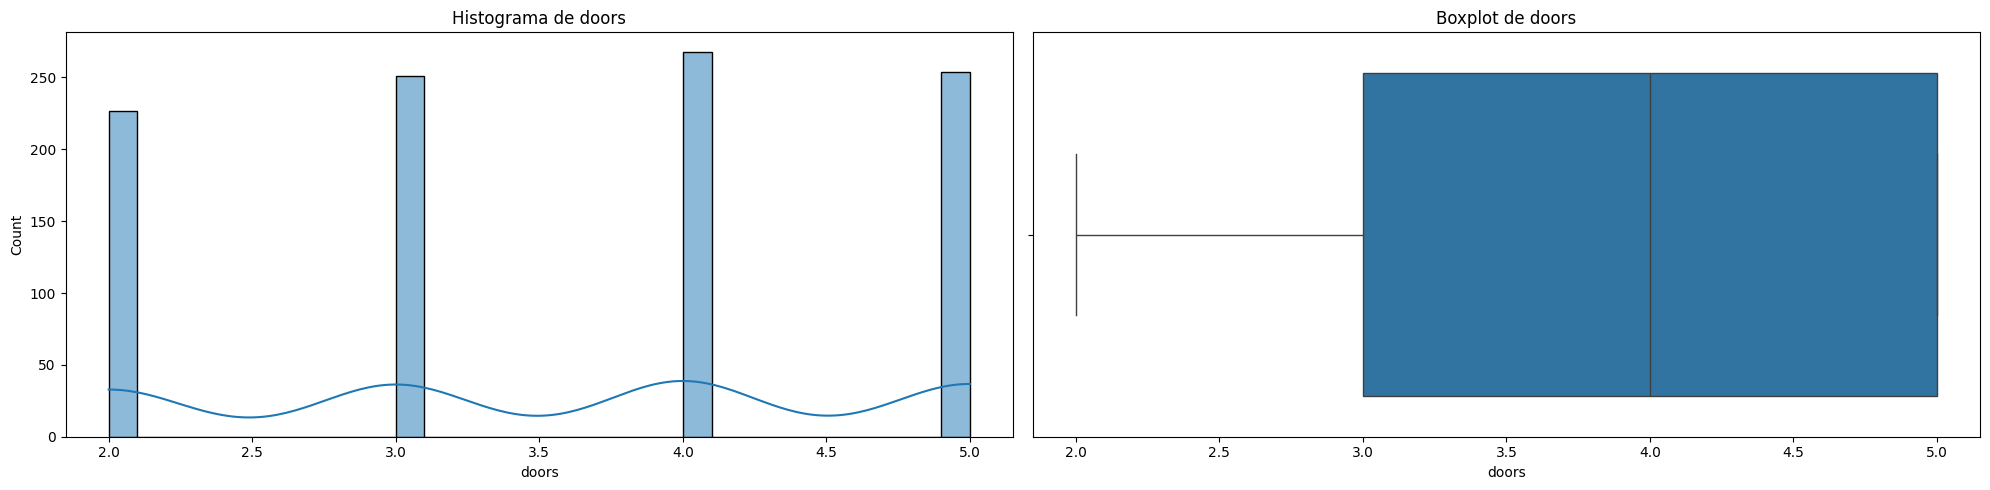


Regressão Linear Simples:
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.108
Date:                Tue, 06 May 2025   Prob (F-statistic):              0.293
Time:                        23:18:05   Log-Likelihood:                -10306.
No. Observations:                1000   AIC:                         2.062e+04
Df Residuals:                     998   BIC:                         2.062e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.975e+04    

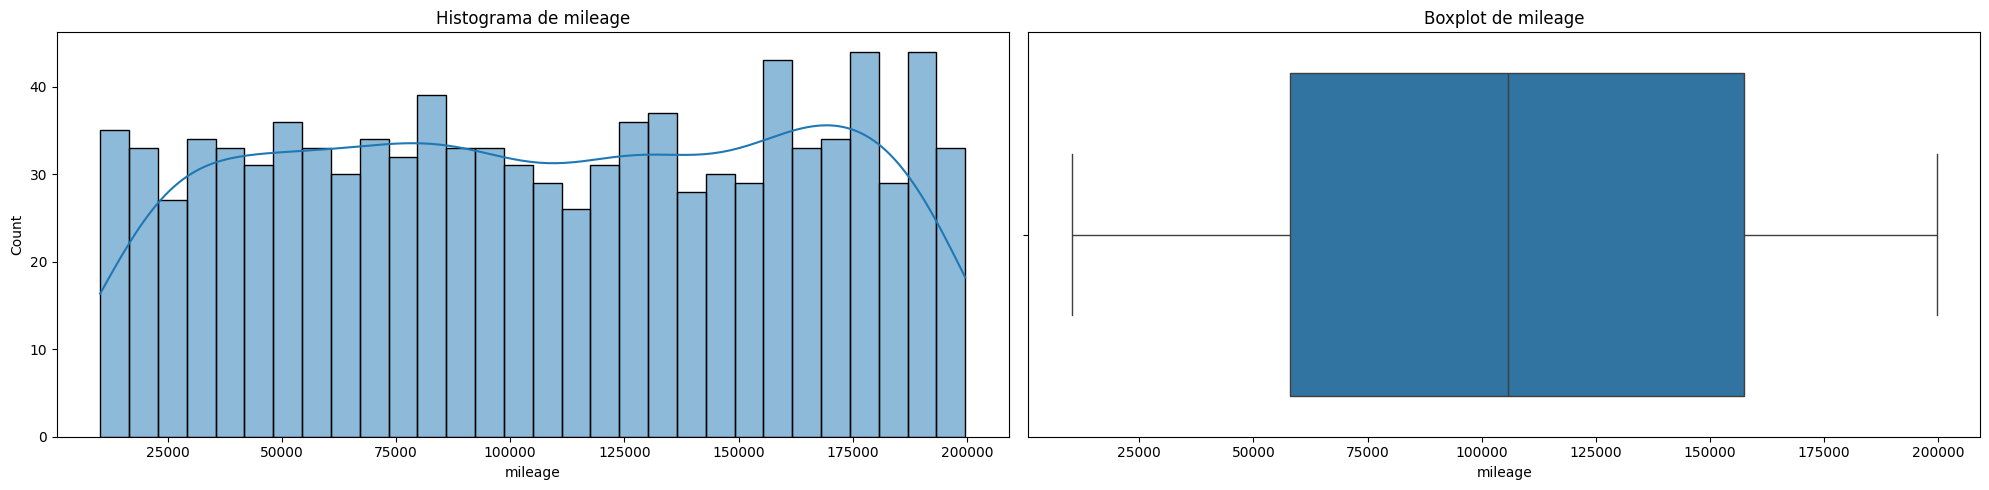


Regressão Linear Simples:
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.1233
Date:                Tue, 06 May 2025   Prob (F-statistic):              0.726
Time:                        23:18:06   Log-Likelihood:                -10306.
No. Observations:                1000   AIC:                         2.062e+04
Df Residuals:                     998   BIC:                         2.063e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.037e+04    

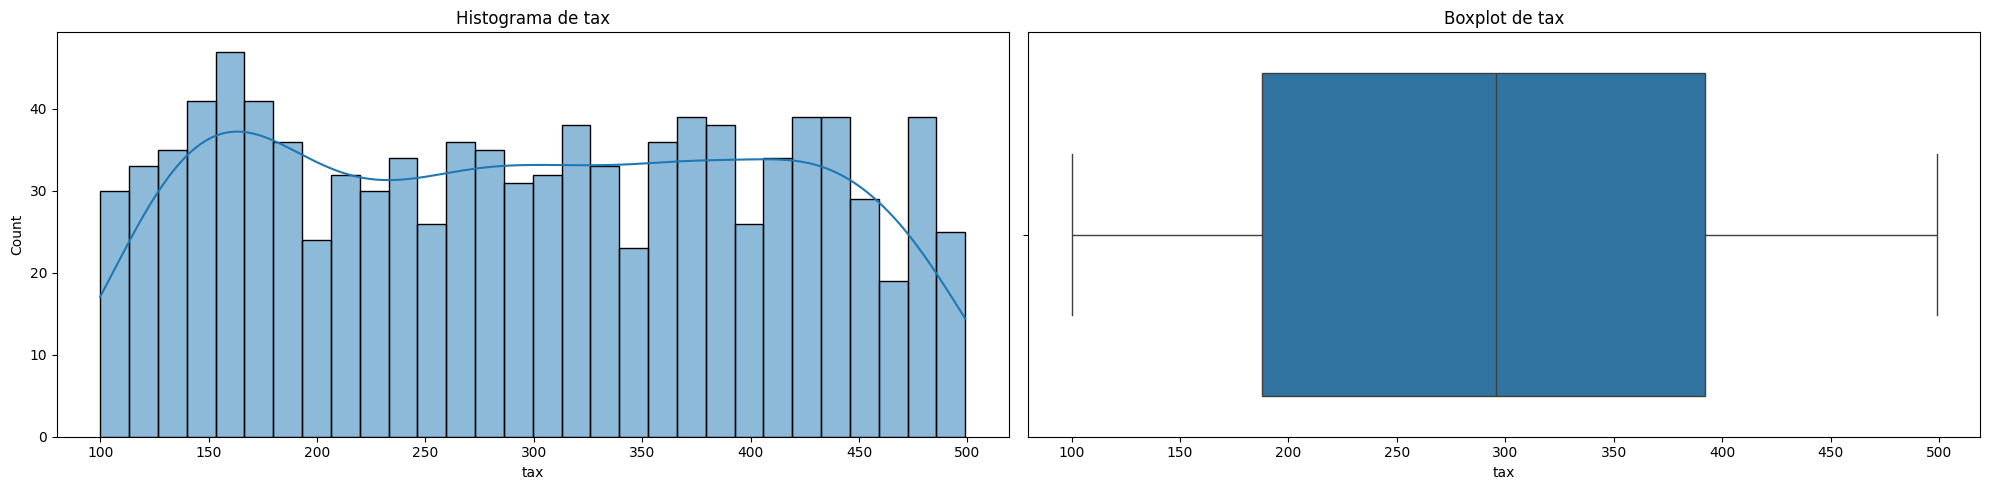


Regressão Linear Simples:
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                   0.08162
Date:                Tue, 06 May 2025   Prob (F-statistic):              0.775
Time:                        23:18:07   Log-Likelihood:                -10306.
No. Observations:                1000   AIC:                         2.062e+04
Df Residuals:                     998   BIC:                         2.063e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.036e+04    

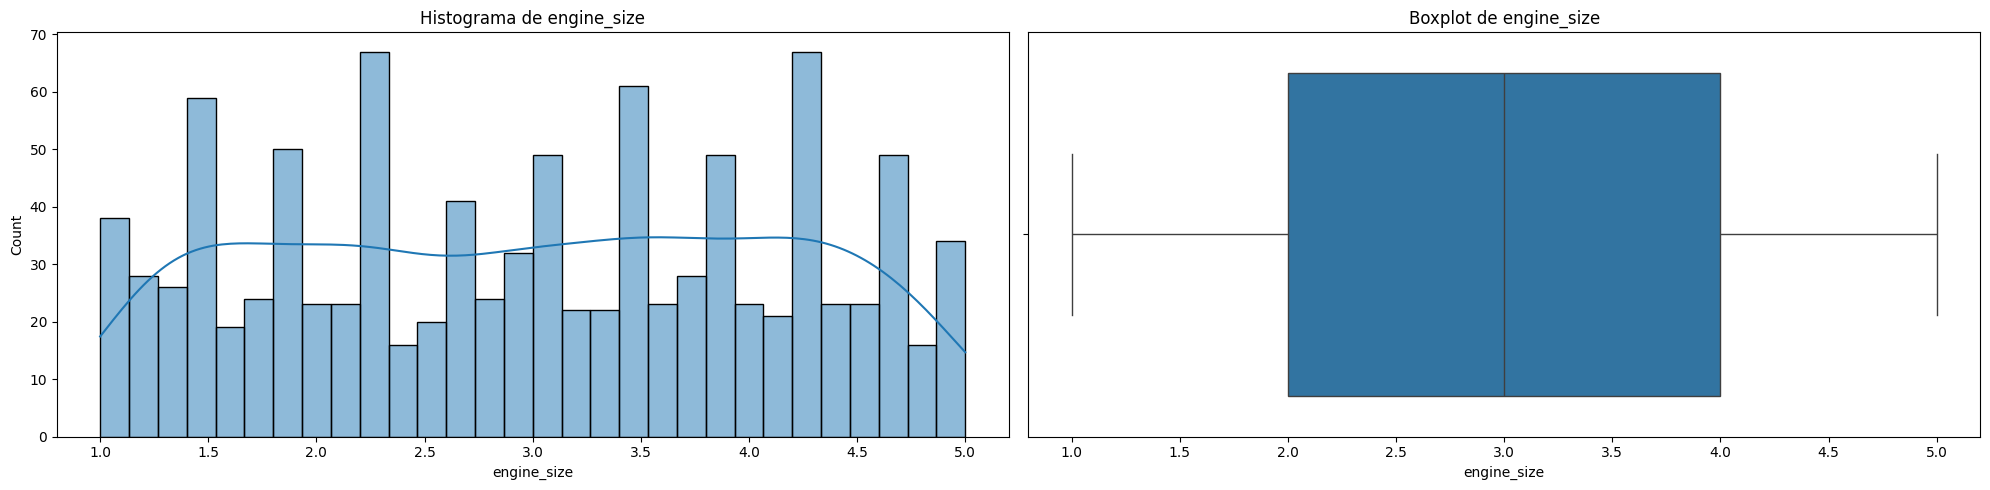


Regressão Linear Simples:
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                 3.287e-05
Date:                Tue, 06 May 2025   Prob (F-statistic):              0.995
Time:                        23:18:07   Log-Likelihood:                -10306.
No. Observations:                1000   AIC:                         2.062e+04
Df Residuals:                     998   BIC:                         2.063e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        2.053e+04 

In [12]:
# Análises para cada uma das 5 variáveis mais correlacionadas

for var in top5_corr.index:
    print(f"\n=== Análise para variável: {var} ===")

    # 1. Histograma, Boxplot
    fig, axs = plt.subplots(1, 2, figsize=(20, 5))

    # Histograma
    sns.histplot(df[var], bins=30, ax=axs[0], kde=True)
    axs[0].set_title(f'Histograma de {var}')

    # Boxplot
    sns.boxplot(x=df[var], ax=axs[1])
    axs[1].set_title(f'Boxplot de {var}')

    plt.tight_layout()
    plt.show()

    # 2. Regressão Linear Simples
    X = sm.add_constant(df[var])
    y = df['price']

    model = sm.OLS(y, X).fit()

    print("\nRegressão Linear Simples:")
    print(model.summary())

    coef = model.params[var]
    r2 = model.rsquared

    print("\nInterpretação:")
    print(f"Coeficiente de {var}: {coef:.2f}")
    print(f"R² do modelo: {r2:.2f}")

    if coef > 0:
        print("Quanto maior o valor de", var, "maior tende a ser o preço.")
    else:
        print("Quanto maior o valor de", var, "menor tende a ser o preço.")

    print("-" * 50)

○ Plote o scatterplot (gráfico de dispersão), com price no eixo Y e a
variável no eixo X.

As 5 variáveis mais correlacionadas com 'price' são: ['doors', 'mileage', 'tax', 'engine_size', 'mpg']


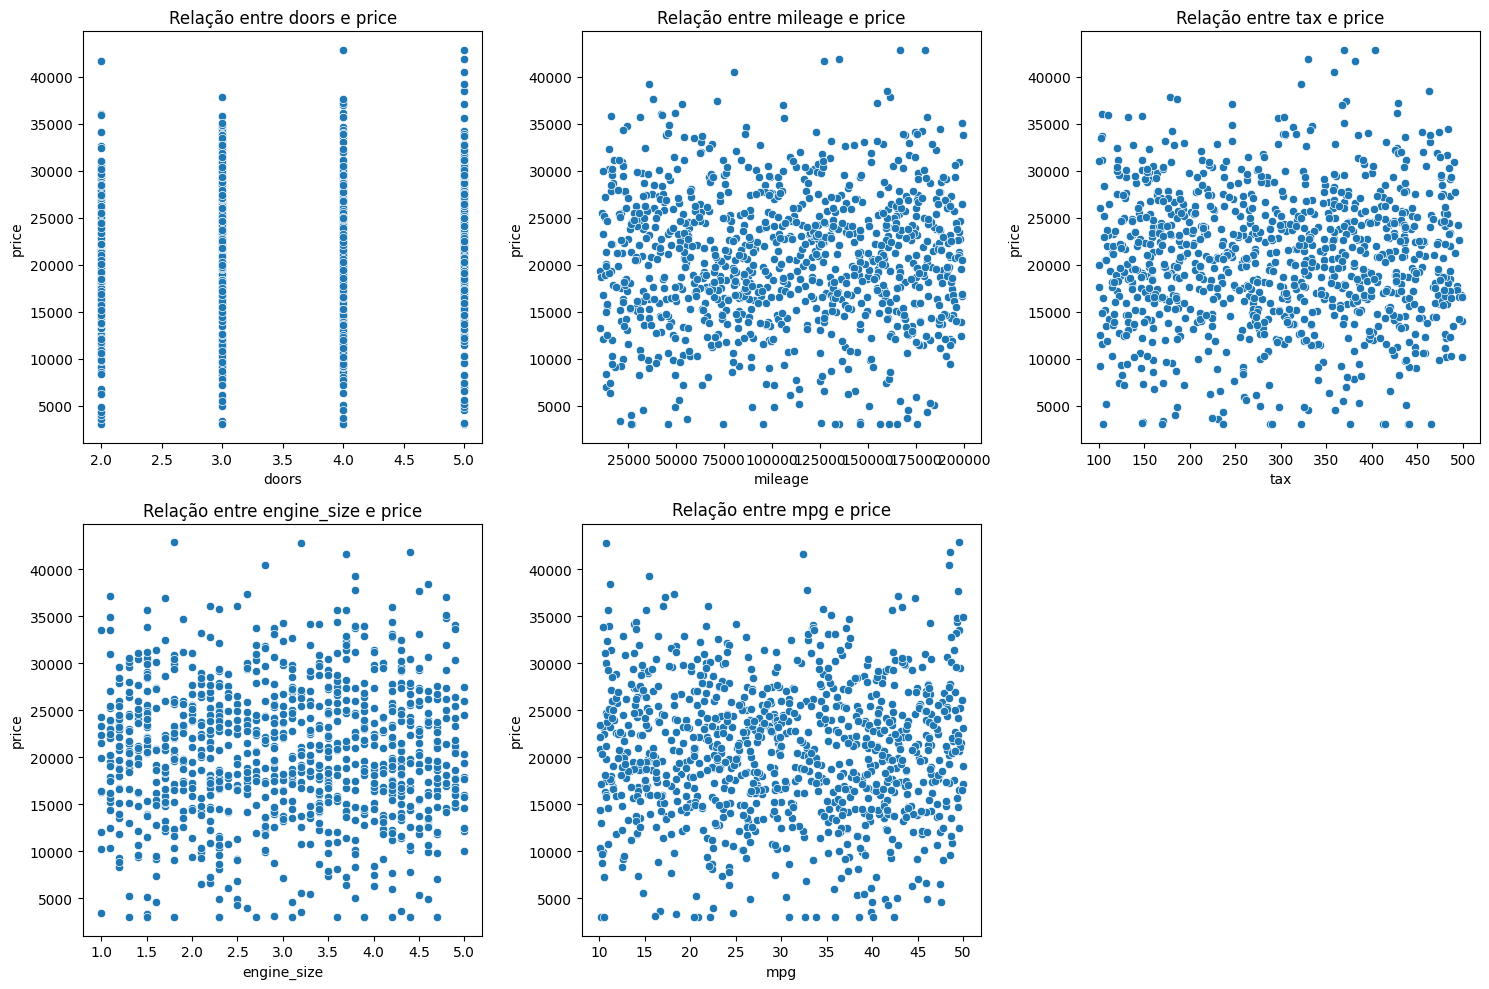

In [7]:
#Correlação co PRICE somente com números
correlacao_price = df.select_dtypes(include=["number"]).corr()["price"].sort_values(ascending=False)

# Remover ID da lista
correlacao_price = correlacao_price.drop("id", errors="ignore")

#5 variáveis mais correlacionadas com PRICE
top_5_variaveis = correlacao_price.index[1:6]
print("As 5 variáveis mais correlacionadas com 'price' são:", top_5_variaveis.tolist())

# Visualização com gráficos de dispersão
plt.figure(figsize=(15, 10))
for i, var in enumerate(top_5_variaveis, 1):
    plt.subplot(2, 3, i)
    sns.scatterplot(x=df[var], y=df["price"])
    plt.title(f"Relação entre {var} e price")

plt.tight_layout()
plt.show()


○ Faça uma regressão linear simples, utilizando cada variável como
preditora (X) e o preço como resposta (Y). Interprete os coeficientes e
o R².

In [8]:
# Lista de variáveis
top_5 = ['doors', 'mileage', 'tax', 'engine_size', 'mpg']

# Rodando regressão para cada variável
for variavel in top_5:
    X = df[[variavel]]
    y = df['price']

    model = LinearRegression()
    model.fit(X, y)

    r_squared = model.score(X, y)
    coef = model.coef_[0]
    intercept = model.intercept_

    print(f"\nRegressão: Preço ~ {variavel}")
    print(f"Coeficiente angular: {coef:.2f}")
    print(f"Intercepto: {intercept:.2f}")
    print(f"R²: {r_squared:.4f}")


Regressão: Preço ~ doors
Coeficiente angular: 219.18
Intercepto: 19747.03
R²: 0.0011

Regressão: Preço ~ mileage
Coeficiente angular: 0.00
Intercepto: 20369.96
R²: 0.0001

Regressão: Preço ~ tax
Coeficiente angular: 0.57
Intercepto: 20356.92
R²: 0.0001

Regressão: Preço ~ engine_size
Coeficiente angular: -1.14
Intercepto: 20528.30
R²: 0.0000

Regressão: Preço ~ mpg
Coeficiente angular: -5.07
Intercepto: 20676.80
R²: 0.0001


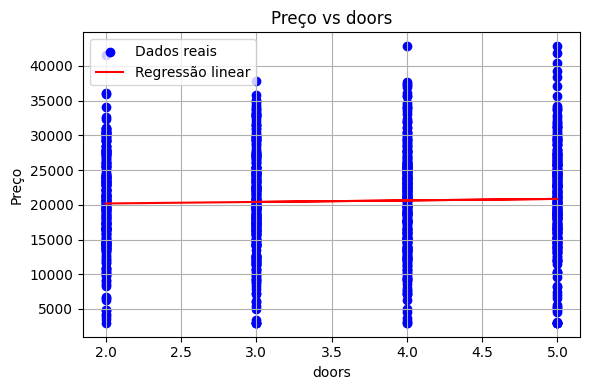

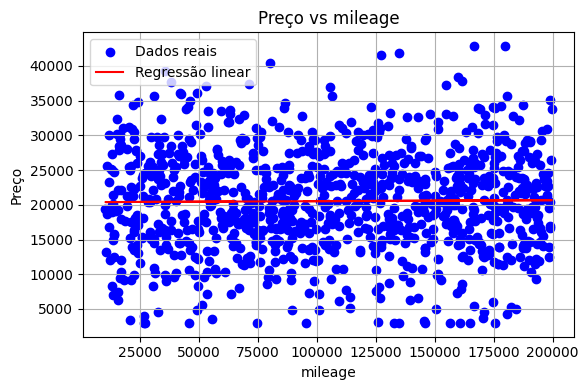

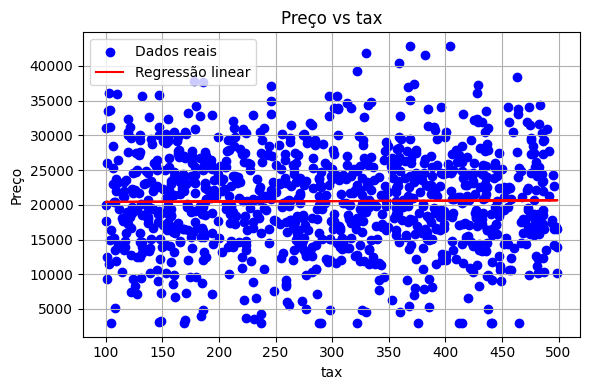

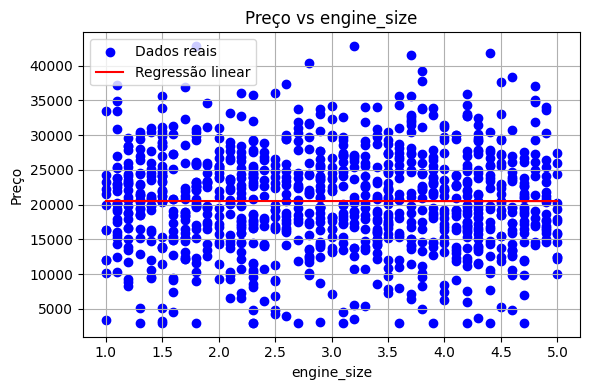

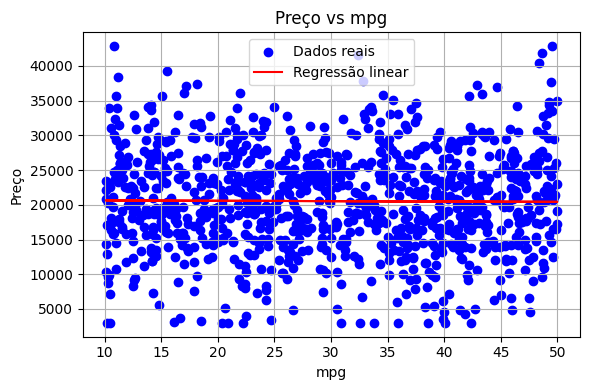

In [9]:
for variavel in top_5:
    X = df[[variavel]]

    model = LinearRegression()
    model.fit(X, y)

    plt.figure(figsize=(6, 4))
    plt.scatter(X, y, color='blue', label='Dados reais')
    plt.plot(X, model.predict(X), color='red', label='Regressão linear')
    plt.xlabel(variavel)
    plt.ylabel('Preço')
    plt.title(f'Preço vs {variavel}')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()